In [11]:
import pandas as pd
import folium

In [12]:
crimes=pd.read_csv("crimes-in-boston\crimes-in-boston\crime.csv", encoding="latin-1")
crimes

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [14]:
m=crimes.isnull().sum()

In [15]:
m

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                    0
REPORTING_AREA              0
SHOOTING               296610
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                    930
Lat                         0
Long                        0
Location                    0
dtype: int64

In [16]:
crimes.dropna(subset=["Lat","Long", "DISTRICT"],inplace= True)

array([[<Axes: title={'center': 'OFFENSE_CODE'}>,
        <Axes: title={'center': 'YEAR'}>],
       [<Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'HOUR'}>],
       [<Axes: title={'center': 'Lat'}>,
        <Axes: title={'center': 'Long'}>]], dtype=object)

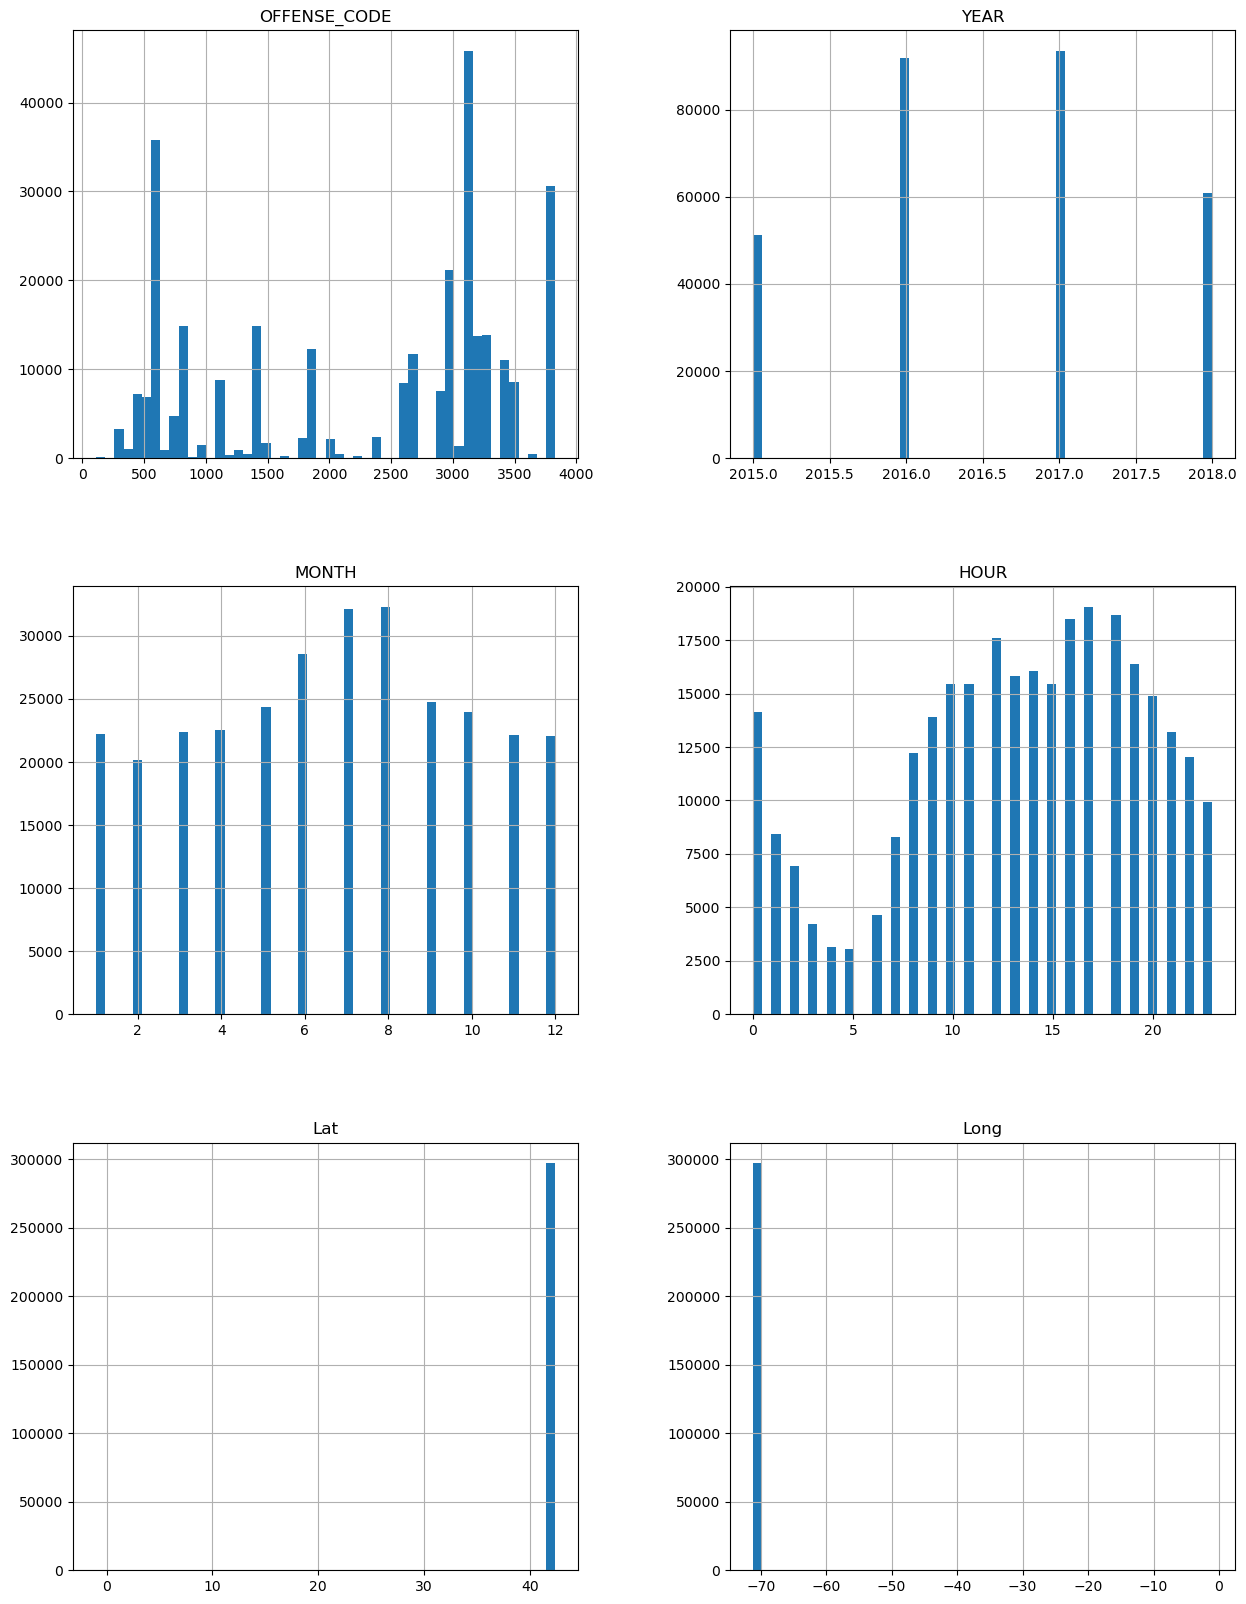

In [17]:
crimes.hist(bins=50, figsize=(15,20))

crimes in 2018

In [18]:
crimes = crimes[crimes.OFFENSE_CODE_GROUP.isin([
    'Larceny', 'Auto Theft', 'Robbery', 'Larceny From Motor Vehicle', 'Residential Burglary',
    'Simple Assault', 'Harassment', 'Ballistics', 'Aggravated Assault', 'Other Burglary', 
    'Arson', 'Commercial Burglary', 'HOME INVASION', 'Homicide', 'Criminal Harassment', 
    'Manslaughter'])]
crimes = crimes[crimes.YEAR>=2018]

In [20]:
crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
19,I182070915,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,B2,181,NaN,2018-09-02 18:00:00,2018,9,Sunday,18,Part One,SHIRLEY ST,42.325695,-71.068168,"(42.32569490, -71.06816778)"
24,I182070908,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,B2,911,NaN,2018-09-03 18:38:00,2018,9,Monday,18,Part One,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"


to reduce the amount of data we need to fit on the map, we'll (temporarily) confine our attention to daytime robberies.

In [29]:
daytime_robberies = crimes[((crimes.OFFENSE_CODE_GROUP == 'Robbery') & \
                            (crimes.HOUR.isin(range(9,18))))]

In [31]:
daytime_robberies

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
299,I182070598,311,Robbery,ROBBERY - COMMERCIAL,A15,60,NaN,2018-09-02 17:15:00,2018,9,Sunday,17,Part One,RUTHERFORD AVE,42.371673,-71.063264,"(42.37167264, -71.06326413)"
527,I182070342,381,Robbery,ROBBERY - CAR JACKING,E18,490,NaN,2018-09-01 17:05:00,2018,9,Saturday,17,Part One,CUMMINS HWY,42.276453,-71.112980,"(42.27645319, -71.11297971)"
562,I182070309,361,Robbery,ROBBERY - OTHER,D4,151,NaN,2018-09-01 15:00:00,2018,9,Saturday,15,Part One,BERKELEY ST,42.346055,-71.070507,"(42.34605510, -71.07050669)"
1127,I182069693,301,Robbery,ROBBERY - STREET,A1,74,NaN,2018-08-30 15:24:00,2018,8,Thursday,15,Part One,BULFINCH PL,42.362191,-71.062238,"(42.36219081, -71.06223802)"
1135,I182069687,301,Robbery,ROBBERY - STREET,B2,278,NaN,2018-08-28 12:00:00,2018,8,Tuesday,12,Part One,HARRISON AVE,42.331538,-71.080157,"(42.33153805, -71.08015661)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66122,I182000161,311,Robbery,ROBBERY - COMMERCIAL,E13,307,NaN,2018-01-01 14:59:00,2018,1,Monday,14,Part One,WASHINGTON ST,42.315846,-71.098248,"(42.31584636, -71.09824825)"
104826,I172066565,301,Robbery,ROBBERY - STREET,A1,102,NaN,2018-03-30 10:00:00,2018,3,Friday,10,Part One,TREMONT ST,42.356585,-71.061895,"(42.35658500, -71.06189505)"
174627,I162098332,361,Robbery,ROBBERY - OTHER,E13,572,NaN,2018-01-15 17:15:00,2018,1,Monday,17,Part One,IFFLEY RD,42.312366,-71.099337,"(42.31236627, -71.09933740)"
174629,I162098332,301,Robbery,ROBBERY - STREET,E13,572,NaN,2018-01-15 17:15:00,2018,1,Monday,17,Part One,IFFLEY RD,42.312366,-71.099337,"(42.31236627, -71.09933740)"


In [33]:
daytime_robberies_map=folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)
daytime_robberies_map

Add points to the map

In [35]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

The iterrows() method generates an iterator object of the DataFrame, allowing us to iterate each row in the DataFrame
tiles can be cartodbpositron,'openstreetmap','stamenterrain','stamenwatercolor'.The options for built-in tile sources in folium can be found here(http://python-visualization.github.io/folium/modules.html#folium.raster_layers.TileLayer). External sources(http://leaflet-extras.github.io/leaflet-providers/preview/).

In [40]:
daytime_robberies_map=folium.Map(location=[42.32,-71.0589], tiles='openstreetmap', zoom_start=13)
for idx, row in daytime_robberies.iterrows():
    Marker([row['Lat'], row['Long']]).add_to(daytime_robberies_map)
daytime_robberies_map


# folium.plugins.MarkerCluster
If we have a lot of markers to add, folium.plugins.MarkerCluster() can help to declutter the map. Each marker is added to a MarkerCluster object.

isnan() in numpy library can be used to check if the value is null/NaN. It is similar to isna() in pandas

The math. isnan() method checks whether a value is NaN (Not a Number), or not. This method returns True if the specified value is a NaN, otherwise it returns False.


In [41]:
import math

In [42]:
daytime_robberies_map = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
mc = MarkerCluster()
for idx, row in daytime_robberies.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(Marker([row['Lat'], row['Long']]))
daytime_robberies_map.add_child(mc)

# Display the map
daytime_robberies_map

# Bubble maps

A bubble map uses circles instead of markers. By varying the size and color of each circle, we can also show the relationship between location and two other variables.

create a bubble map by using folium.Circle() to iteratively add circles. In the code cell below, robberies that occurred in hours 9-12 are plotted in green, whereas robberies from hours 13-17 are plotted in red.

In [43]:
# Create a base map
daytime_robberies_map = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

def color_producer(val):
    if val <= 12:
        return 'forestgreen'
    else:
        return 'darkred'

# Add a bubble map to the base map
for i in range(0,len(daytime_robberies)):
    Circle(
        location=[daytime_robberies.iloc[i]['Lat'], daytime_robberies.iloc[i]['Long']],
        radius=20,
        color=color_producer(daytime_robberies.iloc[i]['HOUR'])).add_to(daytime_robberies_map)

# Display the map
daytime_robberies_map

# Add Legend

In [46]:
# html to be injected for displaying legend
legendHtml = '''
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: 70px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; Roberry Hours <br>
     &nbsp; <i class="fa fa-circle"
                  style="color:blue"></i> &nbsp; hours 9-12<br>
     &nbsp; <i class="fa fa-circle"
                  style="color:red"></i> &nbsp; hours 9-12 <br>
      </div>
     '''

# inject html corresponding to the legend into the map
daytime_robberies_map.get_root().html.add_child(folium.Element(legendHtml))

# save the map as html file
daytime_robberies_map.save('output.html')